# Exploratory analysis

We will explore a well-known data set known as "Census Income", or "Adult". It's stored as a text file with 15 fields per line.

In [1]:
import pandas as pd\

names = [ 
    "age","workclass","fnlwgt","education","education_num",
    "marital_status","occupation","relationship","race","sex",
    "capital_gain","capital_loss","hours_per_week","country","income_level"
]
dtypes = [ 
    "int64","category","int64","category","int64",
    "category","category","category","category","category",
    "int64","int64","int64","category","category"
]
adult = pd.read_table("adult.data",delimiter=",",names=names,dtype=dict(zip(names,dtypes)))

In [2]:
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income_level
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


One of the simplest ways to break down this data is by gender.

In [3]:
bysex = adult.groupby("sex")
bysex.size()

sex
 Female    10771
 Male      21790
dtype: int64

Or, we could group by country.

In [4]:
bycountry = adult.groupby("country")
bycountry.size()

country
 ?                               583
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                          28
 El-Salvador                     106
 England                          90
 France                           29
 Germany                         137
 Greece                           29
 Guatemala                        64
 Haiti                            44
 Holand-Netherlands                1
 Honduras                         13
 Hong                             20
 Hungary                          13
 India                           100
 Iran                             43
 Ireland                          24
 Italy                            73
 Jamaica                          81
 Japan                            62
 Laos                             18
 Mexico                       

As you can see above, there are 583 rows with an unknown (missing) country.

Let's explore the distributions of high-income individuals among males and females.

In [5]:
bysex["income_level"].value_counts()

sex            
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15128
          >50K      6662
Name: income_level, dtype: int64

A visualization might be more dramatic:

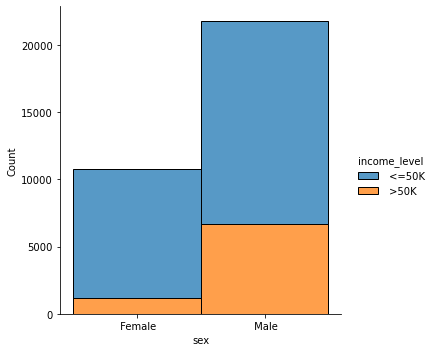

In [6]:
import seaborn as sns
sns.displot(adult,x="sex",hue="income_level",multiple="stack")

It's immediately clear that males have a much greater proportion of high-income individuals. There are other differences between the genders as well, such as age. Since age is quantitative rather than the 2-state category for high income, there is more information to summarize. It often makes sense to begin with plots.

## Histogram 

To visualize a distribution of continuous values, we can use a **histogram**. We choose ordered real values $t_1 < t_2 < \cdots < t_m$. Define *bin* $k$ to be the interval $B_k=[t_k,t_{k+1})$, with the convention that $t_0=-\infty$ and $t_{m+1}=\infty$. This gives us a series of counts $c_k$, where $c_k$ is defined as the number of data values in interval $B_k$. A histogram plots those counts, typically using a bar graph.

Here is a histogram of ages over the whole data set.

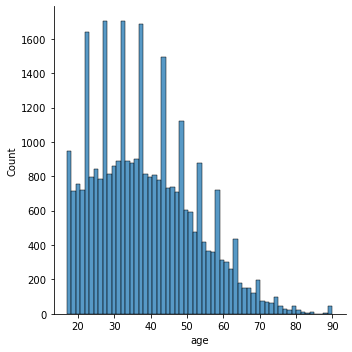

In [7]:
sns.displot(adult,x="age")

Those spikes are unlikely to reflect reality! Presumably, there is some unknown detail about how ages are reported. Perhaps in some countries, they are rounded to the nearest multiple of 5. We can lessen the effect of this anomaly by choosing fewer, wider bins.

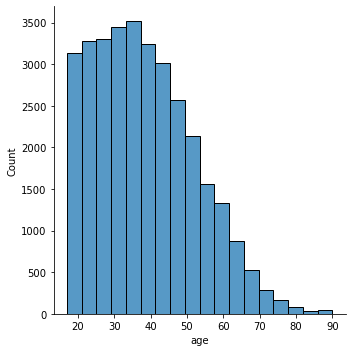

In [8]:
sns.displot(adult,x="age",bins=18)

We can also separate the histogram by gender (or any other grouping we define).

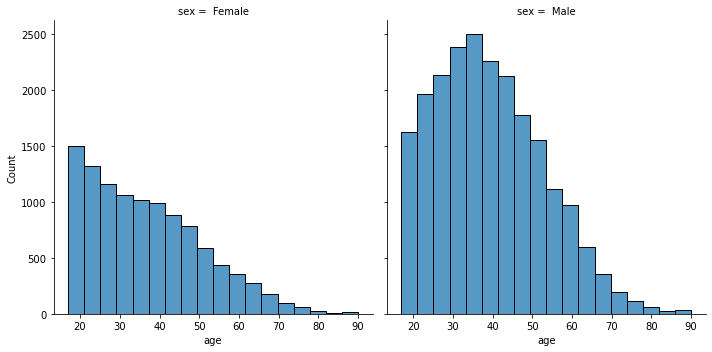

In [9]:
sns.displot(adult,x="age",bins=18,col="sex")

The values for males look like they might be a truncated version of a "bell curve," but the female case appears to be something entirely different, perhaps reflecting a more recent entry into the workforce on average.

## Mean, variance and standard deviation

You know well the mean, or average value. Given values $x_1,\ldots,x_n$, the **mean** is

```{math}
:label: eq-statistics-mean
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i.
```

In [10]:
bysex["age"].mean()

sex
 Female    36.858230
 Male      39.433547
Name: age, dtype: float64

As we see from the histograms, however, there are differences between the genders not captured by the means. Another common statistic tries to quantify the "spread" of the data. The **variance** of values $x_1,\ldots,x_n$ is defined as

```{math}
:label: eq-statistics-var
\sigma^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2.
```

Variance is the average of the squares of deviations from the mean. As such, it has the units of the $x_i$ squared. Its square root $\sigma$, known as the **standard deviation**, has the same units as the data and is more meaningful to compare to the mean.

In [11]:
bysex["age"].std()

sex
 Female    14.013697
 Male      13.370630
Name: age, dtype: float64

### Populations and samples

In statistics one refers to the **population** as the universe of available values. Thus, the entire population of Earth at some instant has a particular mean and standard deviation. However, in order to estimate those values, we can only measure a **sample** of the entire population directly. That's what our data set above must reflect, of course.

It can be proved that {eq}`eq-statistics-mean` is an accurate way to estimate the mean of a population, in a particular sense: if (in a thought experiment) you could average this estimate over all possible samples of size $n$, the result would be exactly the population mean. However, if we use the formula {eq}`eq-statistics-var` to compute variance of a sample, and average over all possible sample sets, we would *not* get the variance of the population; we call this a **biased estimator**. The unbiased estimator for variance is

```{math}
:label: eq-statistics-var-sample
\hat{\sigma}^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2.
```

As you can see from the formulas, the difference between variance and sample variance is small when the sample size $n$ is large. The `std` and `var` methods in pandas all calculate sample standard deviations and variances.

### z-scores

Given data values $x_1,\ldots,x_n$, we can define related values known as **standardized scores** or **z-scores**:

$$
z_i = \frac{x-\mu}{\sigma}, \ldots i=1,\ldots,n.
$$

The z-scores have mean zero and standard deviation equal to 1; in physical terms, they are dimensionless. This makes them attractive to work with and to compare across data sets. In practice, of course, we usually have to settle for sample estimates of $\mu$ and $\sigma$ to compute the z-scores.

## Quantiles and percentiles

Mean, variance, and standard deviation are not necessarily relevant statistics for every data set. There are many alternatives.

For any $0<p<1$, the $100p$-**percentile** is the value $x_p$ such that $p$ is the probability of observing a population value less than or equal to $x_p$. The 50th percentile is known as the **median** of the population.

The unbiased sample median of $x_1,\ldots,x_n$ can be computed by sorting the values into $y_1,\ldots,y_n$. If $n$ is odd, then $y_{(n+1)/2}$ is the sample median; otherwise, the average of $y_{n/2}$ and $y_{1+(n/2)}$ is the sample median. Computing unbiased sample estimates of percentiles other than the median is a little complicated, and we won't go into the details.

```{prf:example}
If the sorted values are $1,3,3,4,5,5,5$, then $n=7$ and the sample median is $y_4=4$. If the sample values are $1,3,3,4,5,5,5,9$, then $n=8$ and the sample median is $(4+5)/2=4.5$.
```

A set of percentiles dividing probability into $q$ equal pieces is called the $q$–**quantiles**. 

```{prf:example}
The 4-quantiles are called **quartiles**. The first quartile is the 25th percentile, or the value that exceeds 1/4 of the population. The second quartile is the median. The third quantile is the 75th percentile. 

Sometimes the definition is extended to the *zeroth quartile*, which is the minimum sample value, and the *fourth quartile*, which is the maximum sample value.
```

One way to measure spread in the values is the **interquartile range** (IQR), which is the difference between the 75th percentile and the 25th percentile.

The `describe` method of a data frame or grouped data frame gives summary statistics that include the quartiles.

In [12]:
bysex["age"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10771.0,36.858230,14.013697,17.0,25.0,35.0,46.0,90.0
Male,21790.0,39.433547,13.370630,17.0,29.0,38.0,48.0,90.0


Thus, the IQR is 21 for females and 19 for males, suggesting that the male distribution is a bit more centrally concentrated.

A common way to visualize quartiles is by a **box plot**.

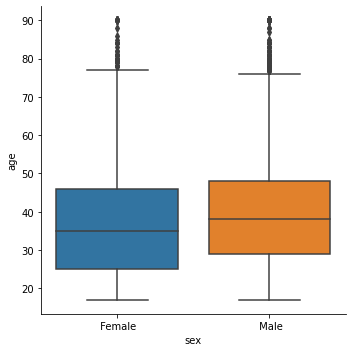

In [13]:
sns.catplot(data=adult,x="sex",y="age",kind="box")

The colored boxes in each category show the quartiles. The "whiskers" extend the box by 1.5 times the IQR in each direction (ending at the extent of the data), and additional values are shown as dots.

## Outliers

Informally, an **outlier** is a data value that is considered "far from typical." There are various ways of deciding what "typical" means, and there is no one-size recommendation for all applications.

The box plot above illustrates one common choice for defining outliers. If $m$ is the median of the data and $I$ is the IQR, then $x$ is declared an outlier if 

$$|x-m| > 1.5I.$$

Hence the dots in the box plots are considered outliers by this criterion. 

It is well known that the mean is more strongly influenced by outliers than the median is. 

```{prf:example}
The values $1,2,3,4,5$ have a mean and median both equal to 3. If we change the largest value to be a lot larger, say $1,2,3,4,1000$, then the mean changes to 202. But the median is still 3!
```

Let's create a series indicating which rows of the table represent outliers within their gender group.

In [14]:
def isoutlier(x):
    I = x.quantile(.75) - x.quantile(.25)   # quantile is defined by pandas
    return abs(x-x.median()) > 1.5*I

outs = bysex["age"].transform(isoutlier)

adult[outs]["age"].describe()

count    1008.000000
mean       72.659722
std         5.700074
min        67.000000
25%        68.000000
50%        71.000000
75%        75.000000
max        90.000000
Name: age, dtype: float64

To negate the outlier indicator series, we can use `~outs`.

In [15]:
bysex = adult[~outs].groupby("sex")
bysex["age"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10435.0,35.710014,12.626255,17.0,25.0,34.0,45.0,66.0
Male,21118.0,38.373994,12.124870,17.0,29.0,37.0,47.0,66.0


Compare these to the previous summary. For both groups, the mean values shifted downward by about 1.1 years, while the median decreased by 1 year.